# Texas Employee Salary Prediction

## Introduction 

The Texas state government employs thousands of individuals across more than 100 agencies, each with different roles, responsibilities, and salary structures. Managing such a vast payroll system requires insights into employee compensation trends, potential disparities, and forecasting capabilities.

This project aims to analyze and model the salary data of Texas state employees. The dataset includes detailed information such as job titles, agencies, pay rates, demographics, and employment history.

Through this project, we aim to:

- Analyze salary trends and patterns across various dimensions.

- Detect outliers and wage disparities.

- Monitor how compensation has changed over time.

- Build predictive models to estimate employee salaries.

This work will support the Texas state government in making data-driven decisions regarding compensation planning and policy enforcement.

## Business Problem 

The Texas state government needs to manage and forecast salaries for thousands of employees across various agencies. They face challenges in identifying pay disparities, tracking salary trends, and predicting future payroll costs.

Goal : 
Analyze employee salary data to detect outliers, understand wage gaps, monitor compensation trends, and build a predictive model to estimate payroll accurately.

## Business Objectives

The main objectives of this project are:

**1. Analyze Salary Data**

Understand salary distributions, identify outliers, and explore trends across departments, roles, and demographics.

**2. Identify Wage Disparities**

Detect differences in compensation between managers and employees across various departments.

**3. Monitor Compensation Trends**

Examine how salaries and total compensation have changed over time.

**4. Predict Payroll**

Build a machine learning model to predict employee salary based on available features such as role, agency, working hours, and demographics.

**5. Support Data-Driven Decisions**

Provide insights and tools that help the Texas state government plan budgets, promote pay equity, and improve salary management.

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Loading

In [2]:
# Load the Data
data = pd.read_csv(r'C:\Users\rajit\Downloads\salary\salary.csv')
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


## Basic Checks

In [3]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [4]:
data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [6]:
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [7]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [8]:
data.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [9]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [10]:
data.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [11]:
data.shape

(149481, 21)

In [12]:
data.duplicated().sum()

0

In [13]:
# Unique values per column
print("\nUnique values per column:")
print(data.nunique())


Unique values per column:
AGENCY                        113
AGENCY NAME                   113
LAST NAME                   38675
FIRST NAME                  23559
MI                             27
CLASS CODE                   1481
CLASS TITLE                  1422
ETHNICITY                       6
GENDER                          2
STATUS                         11
EMPLOY DATE                  6295
HRLY RATE                     206
HRS PER WK                     58
MONTHLY                     40552
ANNUAL                      40554
STATE NUMBER               149465
duplicated                      1
multiple_full_time_jobs         1
combined_multiple_jobs          1
summed_annual_salary           15
hide_from_search                1
dtype: int64


In [14]:
# Check for negative or zero salaries
print("\nRecords with zero or negative annual salary:")
print(data[data['ANNUAL'] <= 0])


Records with zero or negative annual salary:
Empty DataFrame
Columns: [AGENCY, AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS CODE, CLASS TITLE, ETHNICITY, GENDER, STATUS, EMPLOY DATE, HRLY RATE, HRS PER WK, MONTHLY, ANNUAL, STATE NUMBER, duplicated, multiple_full_time_jobs, combined_multiple_jobs, summed_annual_salary, hide_from_search]
Index: []

[0 rows x 21 columns]


In [15]:
# Check range of employment dates
if 'employ_date' in data.columns:
    data['employ_date'] = pd.to_datetime(data['employ_date'], errors='coerce')
    print("\nEmployment date range:")
    print(f"From {data['employ_date'].min().date()} to {data['employ_date'].max().date()}")

## Data Preprocessing

### Drop Unnecessary Columns

In [16]:
data.drop(columns=[
    'duplicated', 
    'multiple_full_time_jobs', 
    'combined_multiple_jobs',
    'summed_annual_salary', 
    'hide_from_search'
], inplace=True)

### Standardize Column Names

In [17]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

### Convert Date Column

In [18]:
data['employ_date'] = pd.to_datetime(data['employ_date'], errors='coerce')

### Convert Salary Columns to Numeric

In [19]:
data['annual'] = pd.to_numeric(data['annual'], errors='coerce')

In [20]:
data['monthly'] = pd.to_numeric(data['monthly'], errors='coerce')

In [21]:
data['hrly_rate'] = pd.to_numeric(data['hrly_rate'], errors='coerce')

In [22]:
data['hrs_per_wk'] = pd.to_numeric(data['hrs_per_wk'], errors='coerce')

### Handle Duplicates

In [23]:
data.drop_duplicates(inplace=True)

### Handle Zero or Negative Salaries

In [24]:
data = data[data['annual'] > 0]

### Encode Categorical Variables

In [25]:
data = pd.get_dummies(data, columns=['gender', 'ethnicity', 'status'], drop_first=True)

## Exploratory Data Analysis (EDA)

###  Distribution of Annual Salary

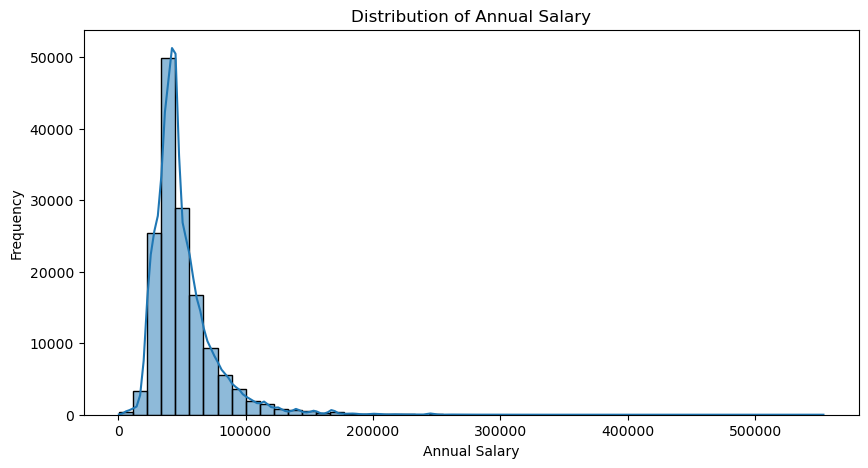

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data['annual'], bins=50, kde=True)
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()

### Boxplot to Detect Outliers in Salary

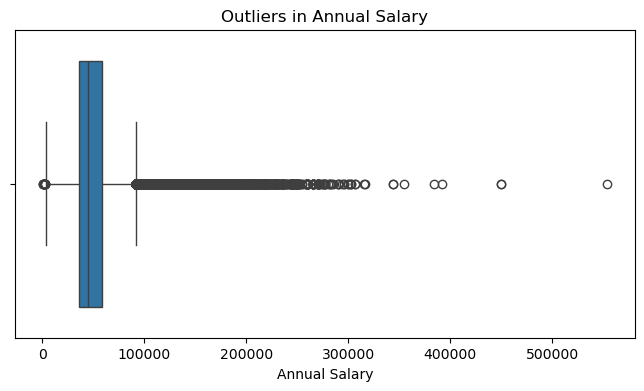

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['annual'])
plt.title('Outliers in Annual Salary')
plt.xlabel('Annual Salary')
plt.show()

### Salary by Gender

In [28]:
data.columns = data.columns.str.strip()

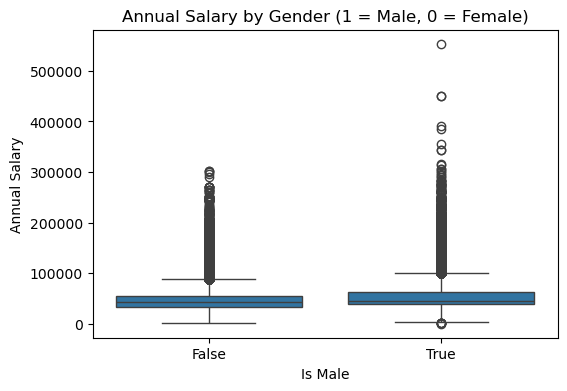

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender_MALE', y='annual', data=data)
plt.title('Annual Salary by Gender (1 = Male, 0 = Female)')
plt.ylabel('Annual Salary')
plt.xlabel('Is Male')
plt.show()

###  Salary by Ethnicity

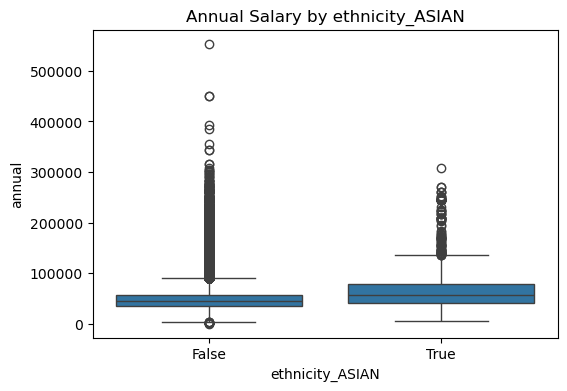

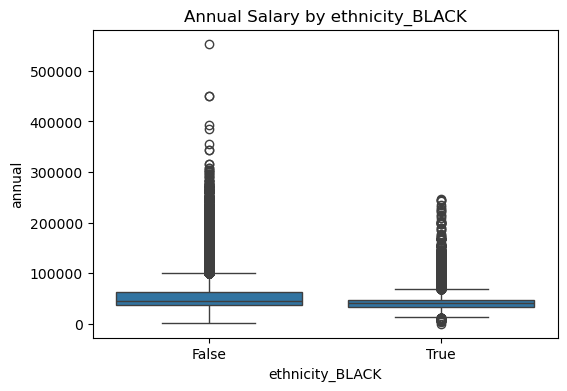

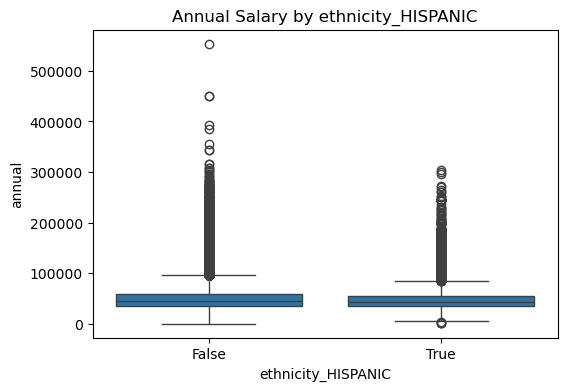

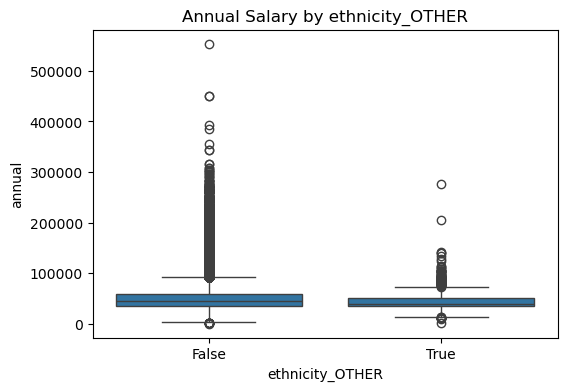

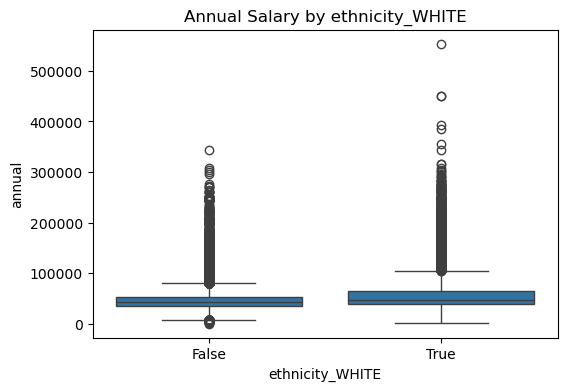

In [30]:
ethnicity_cols = [col for col in data.columns if col.startswith('ethnicity_')]
for col in ethnicity_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y='annual', data=data)
    plt.title(f'Annual Salary by {col}')
    plt.show()

### Average Salary by Department (Top 10)

In [31]:
top_agencies = data['agency_name'].value_counts().nlargest(10).index
data_top_agencies = data[data['agency_name'].isin(top_agencies)]

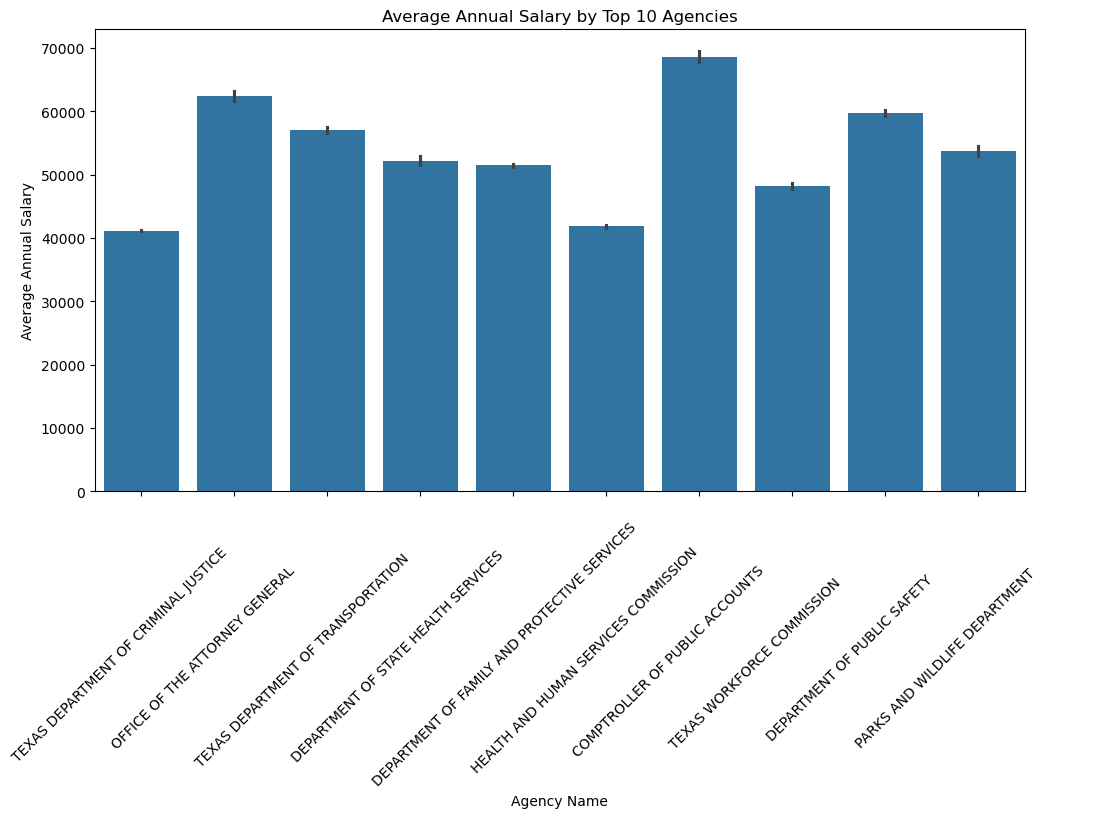

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_top_agencies, x='agency_name', y='annual', estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Annual Salary by Top 10 Agencies')
plt.ylabel('Average Annual Salary')
plt.xlabel('Agency Name')
plt.show()

### Salary vs. Years of Service

In [33]:
# Convert 'employ_date' to datetime 
data['employ_date'] = pd.to_datetime(data['employ_date'], errors='coerce')

In [34]:
# Calculate years of service using today's date
today = datetime.today()
data['years_of_service'] = (today - data['employ_date']).dt.days // 365

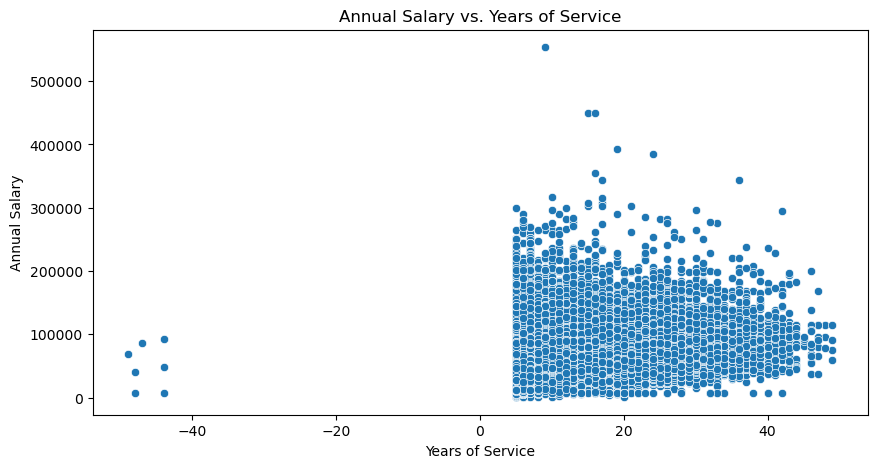

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='years_of_service', y='annual', data=data)
plt.title('Annual Salary vs. Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Annual Salary')
plt.show()

### Correlation Heatmap (Numeric Features)

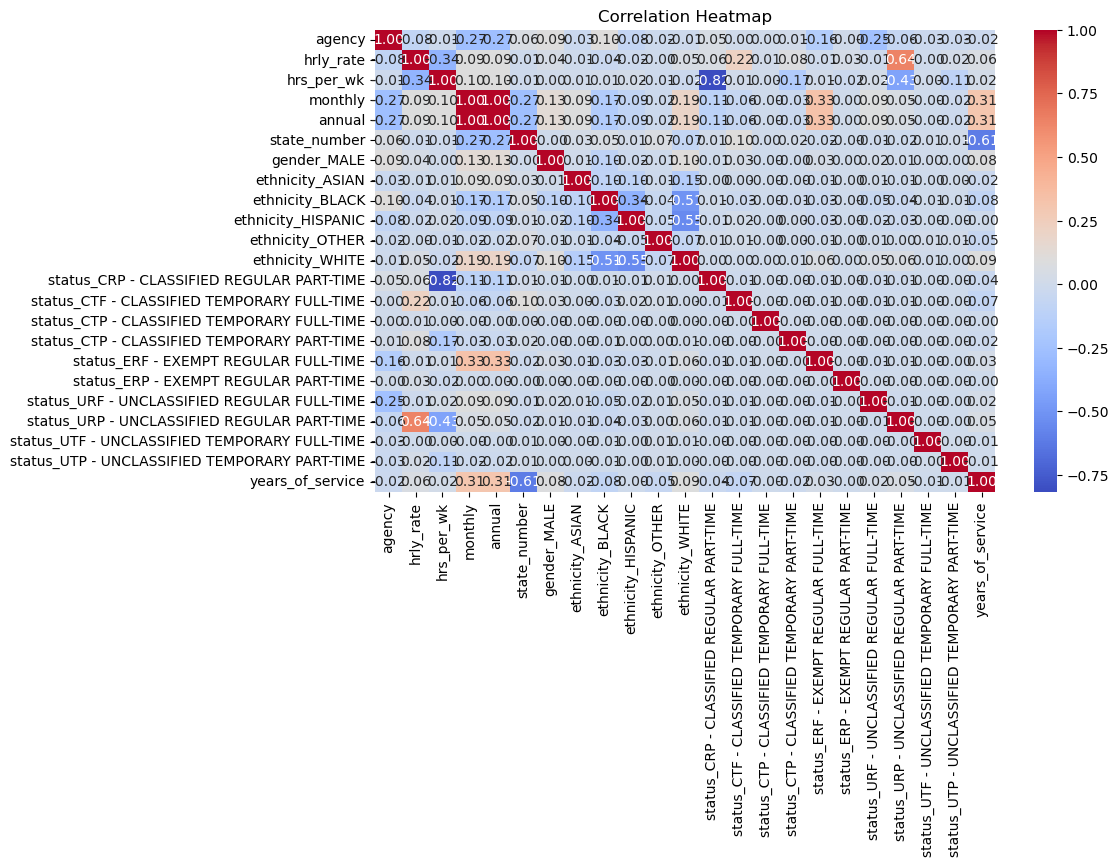

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Salary by Job Title (Top 10 Most Common Jobs)

In [37]:
top_jobs = data['class_title'].value_counts().nlargest(10).index
data_top_jobs = data[data['class_title'].isin(top_jobs)]

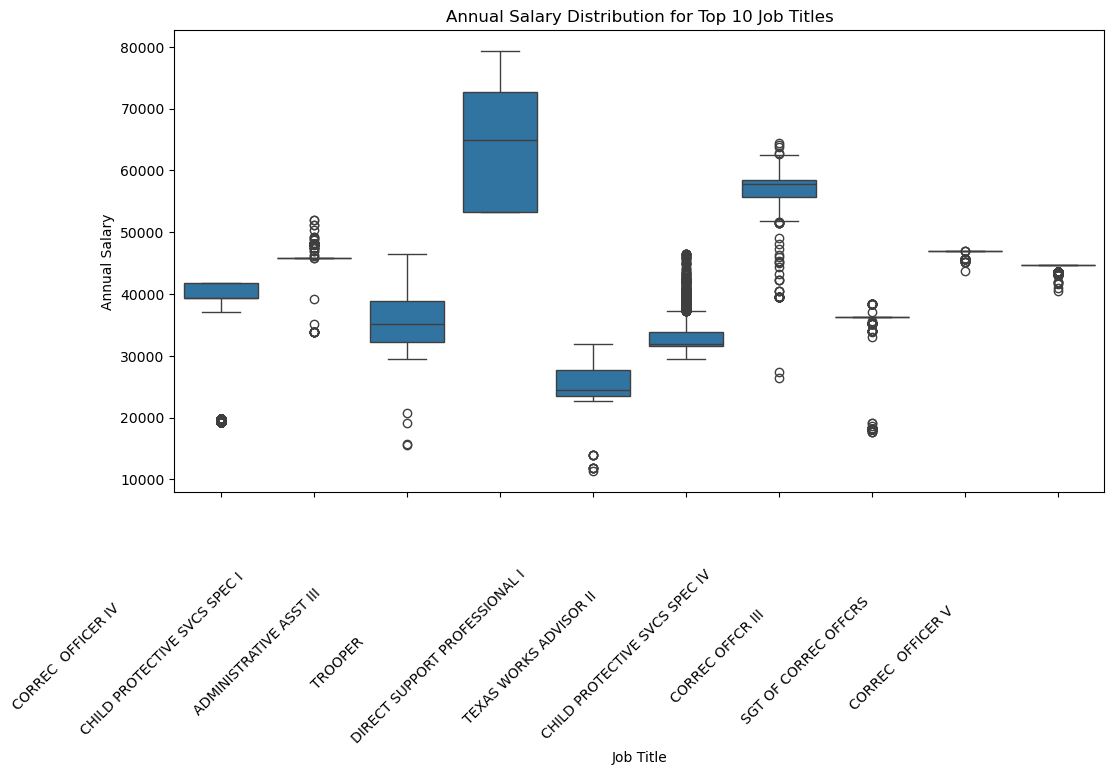

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_top_jobs, x='class_title', y='annual')
plt.xticks(rotation=45, ha='right')
plt.title('Annual Salary Distribution for Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Annual Salary')
plt.show()

### Hours Worked vs Hourly Rate

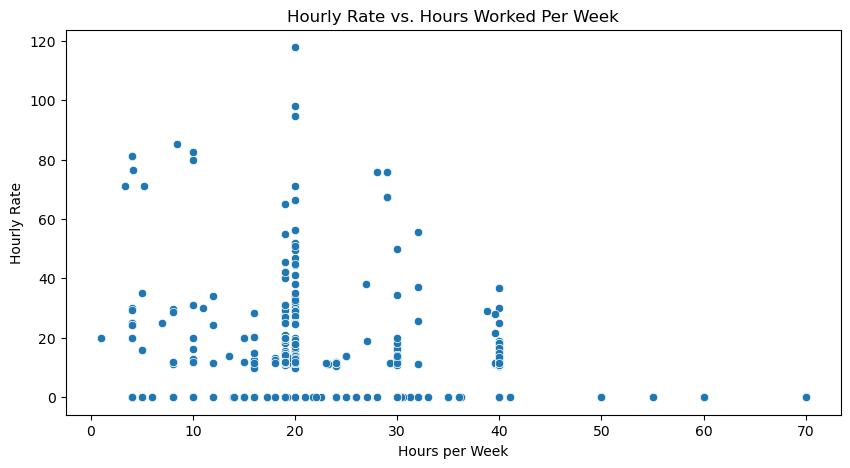

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='hrs_per_wk', y='hrly_rate')
plt.title('Hourly Rate vs. Hours Worked Per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Hourly Rate')
plt.show()

### Count of Employees by Employment Status

In [40]:
status_cols = [col for col in data.columns if col.startswith('status_')]
status_counts = data[status_cols].sum().sort_values(ascending=False)

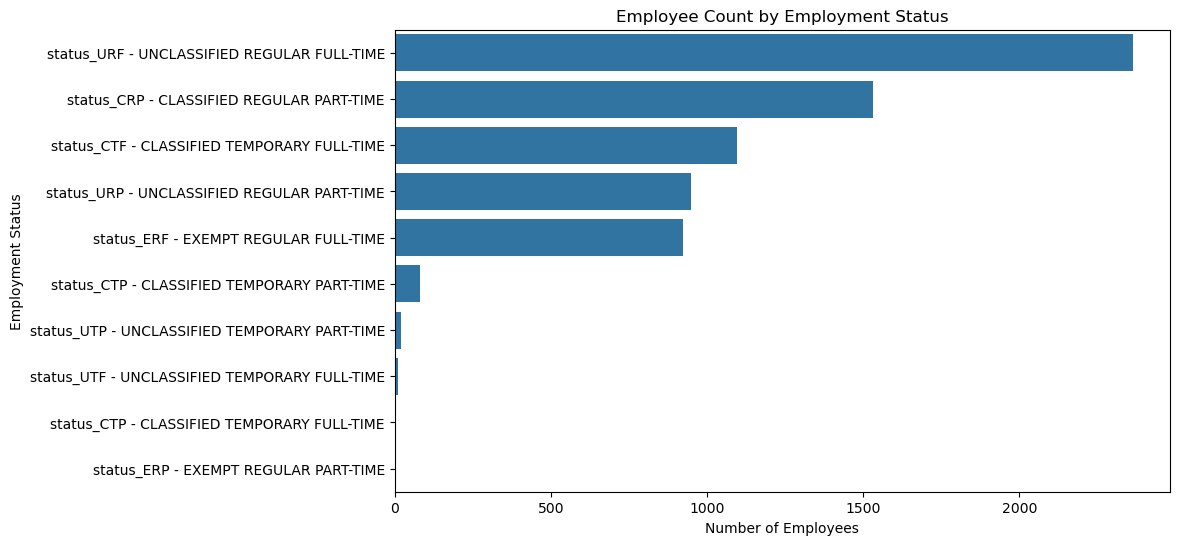

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.values, y=status_counts.index)
plt.title('Employee Count by Employment Status')
plt.xlabel('Number of Employees')
plt.ylabel('Employment Status')
plt.show()

### Monthly vs Annual Salary Consistency Check

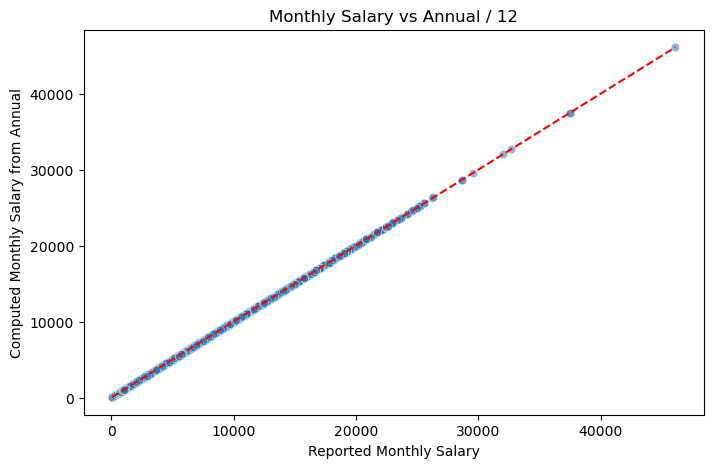

In [42]:
data['monthly_from_annual'] = data['annual'] / 12
plt.figure(figsize=(8, 5))
sns.scatterplot(x='monthly', y='monthly_from_annual', data=data, alpha=0.5)
plt.plot([data['monthly'].min(), data['monthly'].max()], 
         [data['monthly'].min(), data['monthly'].max()], color='red', linestyle='--')
plt.title('Monthly Salary vs Annual / 12')
plt.xlabel('Reported Monthly Salary')
plt.ylabel('Computed Monthly Salary from Annual')
plt.show()

### Top Agencies with Highest Average Salaries

In [43]:
avg_salary_by_agency = data.groupby('agency_name')['annual'].mean().nlargest(10)

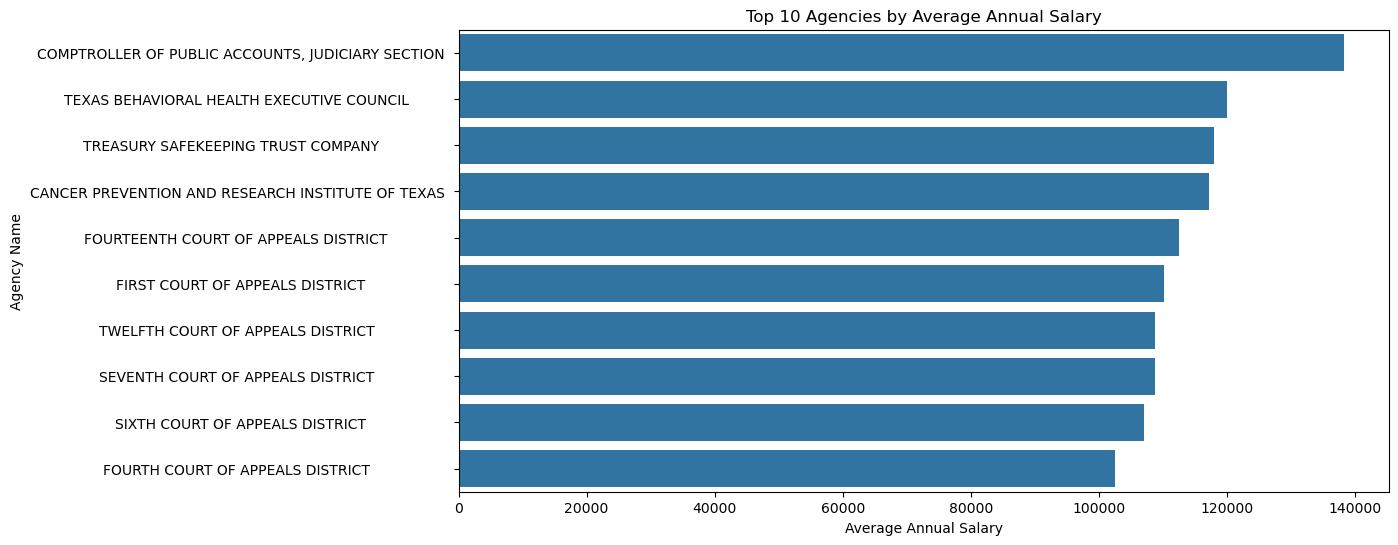

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_agency.values, y=avg_salary_by_agency.index)
plt.title('Top 10 Agencies by Average Annual Salary')
plt.xlabel('Average Annual Salary')
plt.ylabel('Agency Name')
plt.show()

### Distribution of Years of Service 

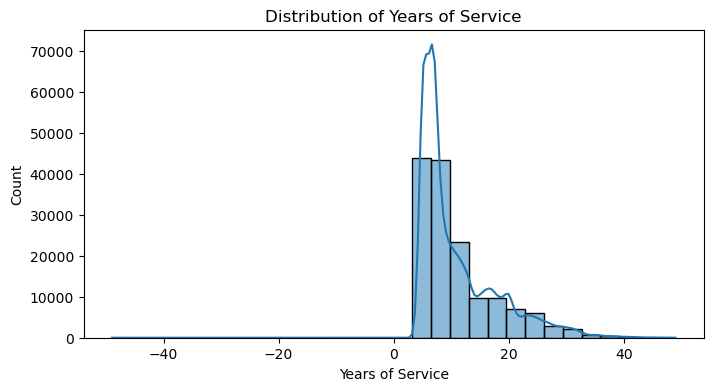

In [45]:
plt.figure(figsize=(8, 4))
sns.histplot(data['years_of_service'], bins=30, kde=True)
plt.title('Distribution of Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Count')
plt.show()

### Salary Distribution by Job Title 

In [46]:
top_titles = data['class_title'].value_counts().nlargest(10).index
data_top_titles = data[data['class_title'].isin(top_titles)]

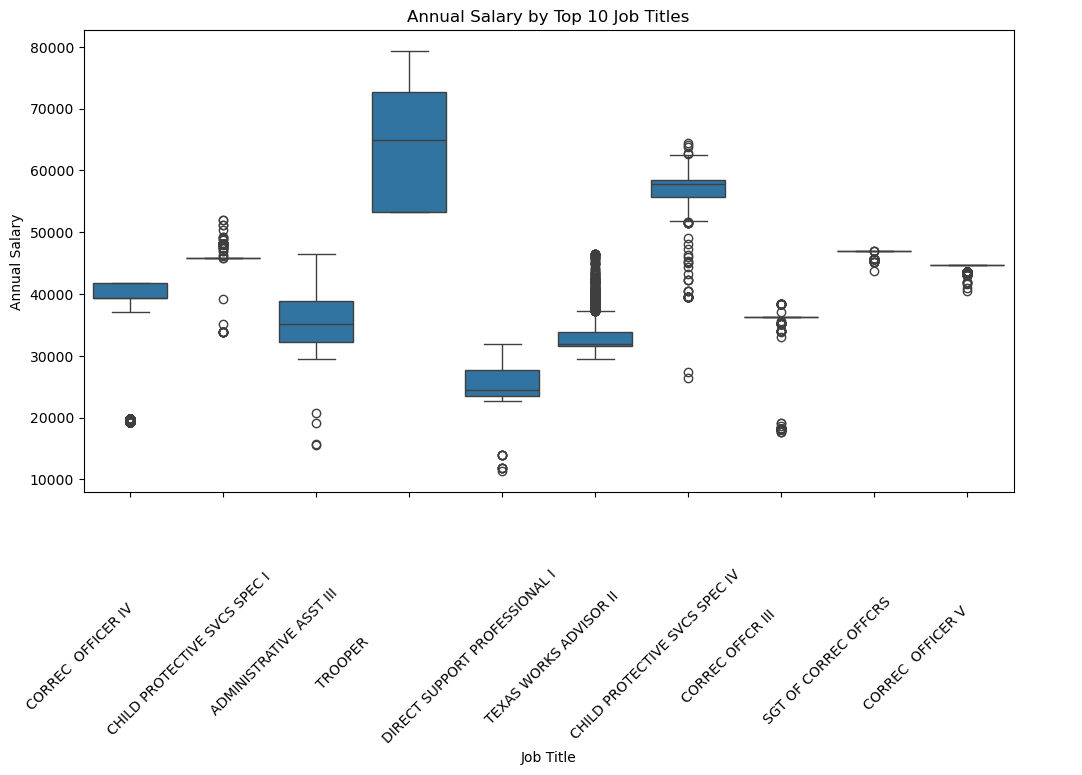

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='class_title', y='annual', data=data_top_titles)
plt.xticks(rotation=45)
plt.title('Annual Salary by Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Annual Salary')
plt.show()

### Hourly Rate vs. Hours per Week

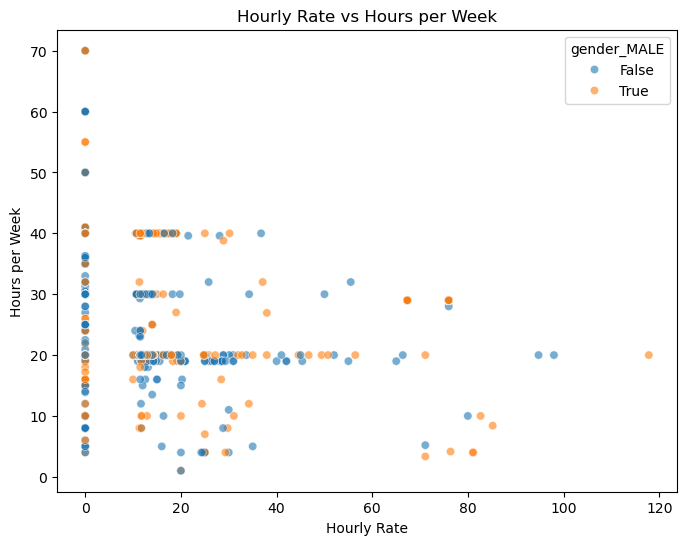

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='hrly_rate', y='hrs_per_wk', hue='gender_MALE', alpha=0.6)
plt.title('Hourly Rate vs Hours per Week')
plt.xlabel('Hourly Rate')
plt.ylabel('Hours per Week')
plt.show()

### Distribution of Employment Duration

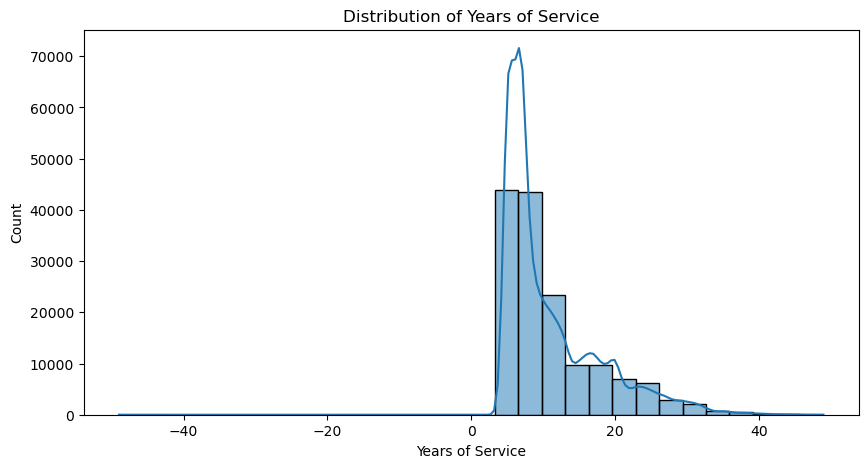

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(data['years_of_service'], bins=30, kde=True)
plt.title('Distribution of Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Count')
plt.show()

### Cross-tab of Employment Status vs. Gender

In [50]:
status_cols = [col for col in data.columns if col.startswith('status_')]
gender_status = data.groupby('gender_MALE')[status_cols].sum().T

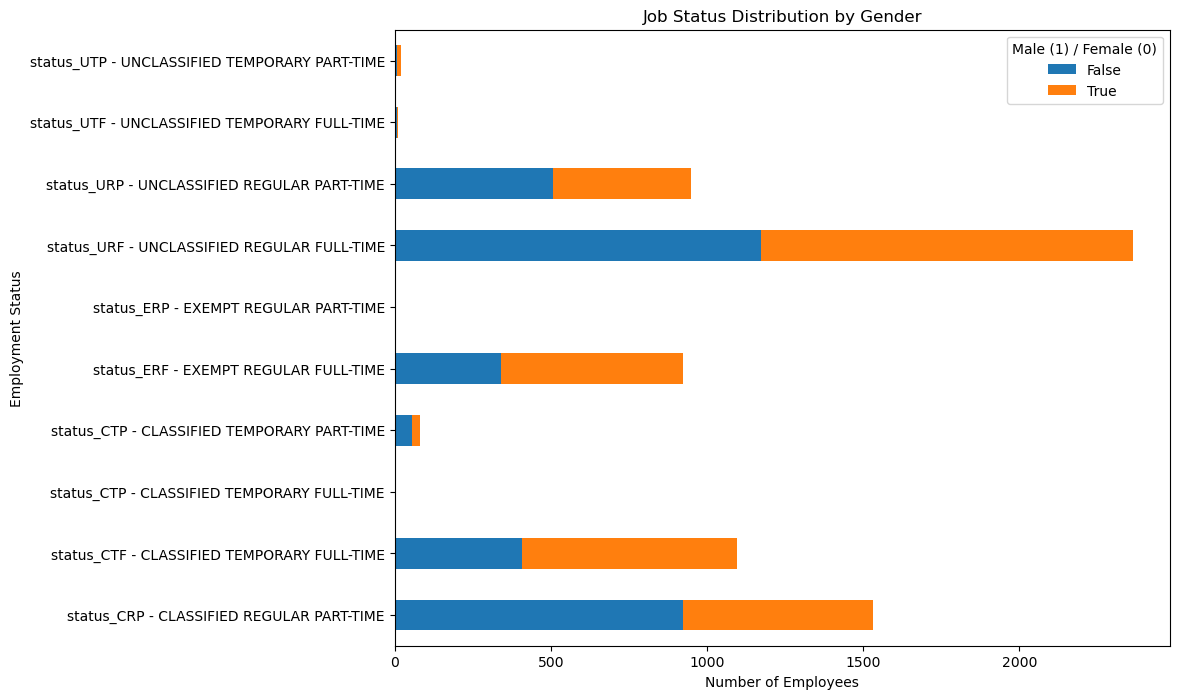

In [51]:
gender_status.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title('Job Status Distribution by Gender')
plt.xlabel('Number of Employees')
plt.ylabel('Employment Status')
plt.legend(title='Male (1) / Female (0)')
plt.show()

### Pairplot of Key Features

In [52]:
# Select a few relevant numerical features
pairplot_features = ['annual', 'hrly_rate', 'hrs_per_wk', 'years_of_service']

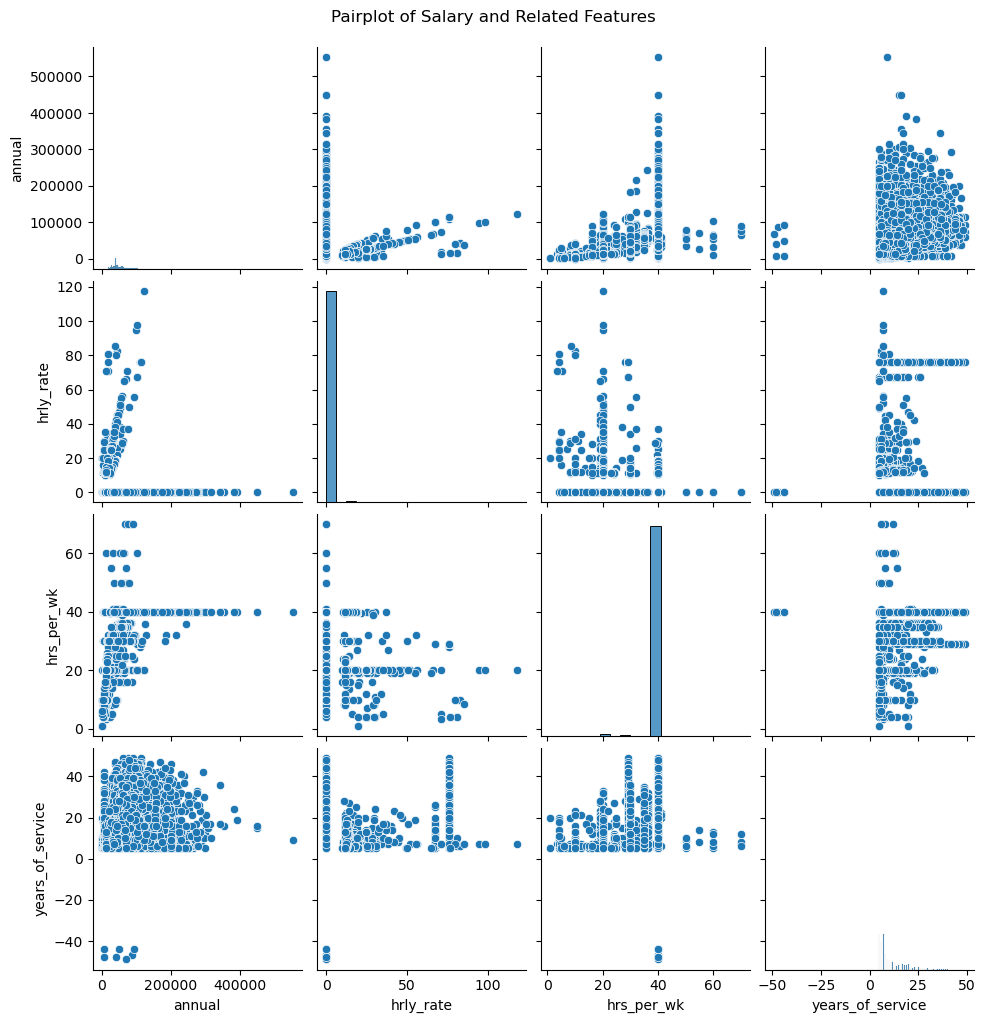

In [53]:
# Create pairplot
sns.pairplot(data[pairplot_features])
plt.suptitle("Pairplot of Salary and Related Features", y=1.02)
plt.show()

### Salary Trends by Employment Type

In [54]:
status_avg = data[status_cols + ['annual']].copy()
status_melted = status_avg.melt(id_vars='annual', var_name='employment_status', value_name='present')
status_melted = status_melted[status_melted['present'] == 1]

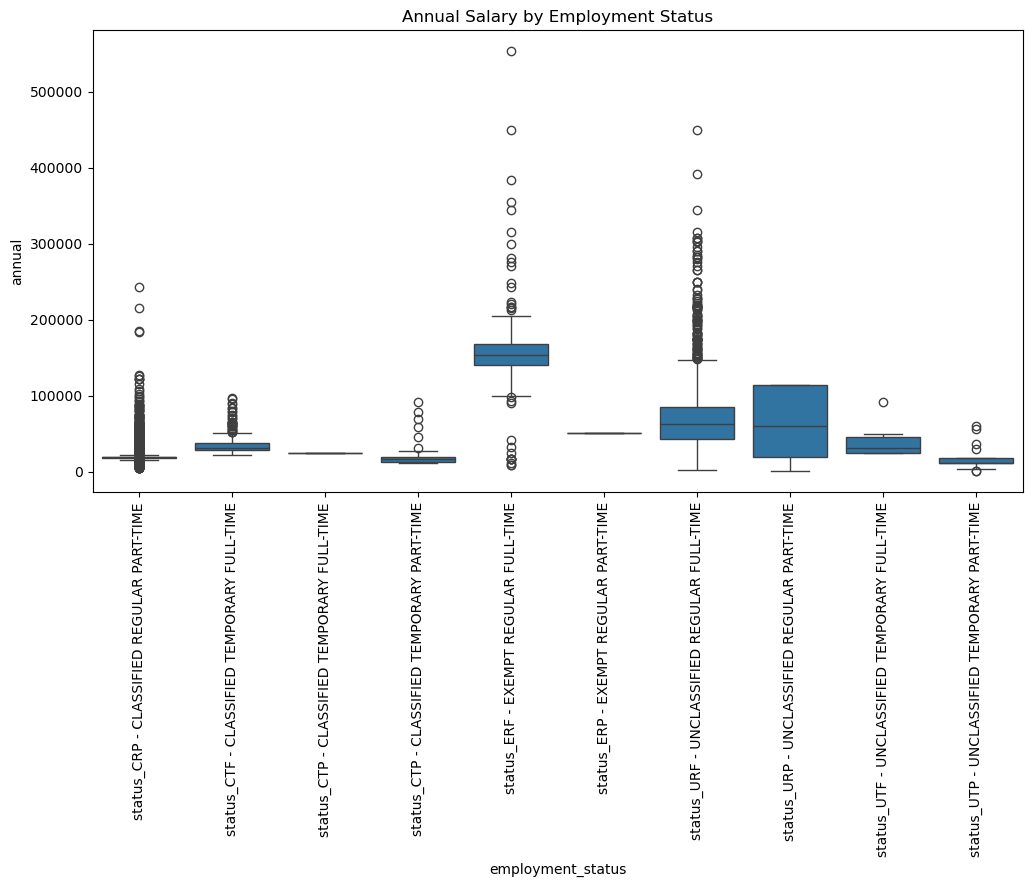

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=status_melted, x='employment_status', y='annual')
plt.xticks(rotation=90)
plt.title('Annual Salary by Employment Status')
plt.show()

## Model Building 

### Feature Selection 

In [56]:
# Define target and drop irrelevant columns
target = 'annual'
drop_cols = ['annual', 'last_name', 'first_name', 'mi', 'state_number', 'employ_date']

In [57]:
X = data.drop(columns=drop_cols)
y = data[target]

### Train - Test Split

In [58]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Model Selection

### Linear Regression

In [59]:
# Drop all object (string) columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

In [60]:
# Initialize model
lr_model = LinearRegression()

In [61]:
# Fit model
lr_model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predict
y_pred_lr = lr_model.predict(X_test)

In [63]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))  
r2 = r2_score(y_test, y_pred_lr)

In [64]:
print("Linear Regression Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

Linear Regression Results:
MAE:  0.00
RMSE: 0.00
R²:   1.0000


### Decision Tree Regressor

In [65]:
# Initialize
dt_model = DecisionTreeRegressor(random_state=42)

In [66]:
# Fit
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [67]:
# Predict on test set
y_pred_dt = dt_model.predict(X_test)

In [68]:
# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

In [69]:
# Print results
print("Decision Tree Regressor Performance:")
print(f"MAE: {mae_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")

Decision Tree Regressor Performance:
MAE: 5.32
RMSE: 602.64
R² Score: 1.00


### Random Forest Regressor

In [70]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

In [71]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [73]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [74]:
# Print results
print("Random Forest Regressor Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Regressor Performance:
MAE: 7.96
RMSE: 807.19
R² Score: 1.00


### XGBoost Regressor

In [75]:
# Initialize the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)

In [76]:
# Fit the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [77]:
# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

In [78]:
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

In [79]:
# Print results
print("XGBoost Regressor Performance:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")

XGBoost Regressor Performance:
MAE: 231.60
RMSE: 2060.04
R² Score: 0.99


### Support Vector Regressor (SVR)

In [80]:
# Scale the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Initialize the model
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

In [82]:
# Fit the model
svr_model.fit(X_train_scaled, y_train)

SVR(C=100)

In [83]:
# Predict on test data
y_pred_svr = svr_model.predict(X_test_scaled)

In [84]:
# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

In [85]:
# Print results
print("SVR Model Performance:")
print(f"MAE: {mae_svr:.2f}")
print(f"RMSE: {rmse_svr:.2f}")
print(f"R² Score: {r2_svr:.2f}")

SVR Model Performance:
MAE: 1230.73
RMSE: 10309.27
R² Score: 0.83


## Compare Model Performance

In [86]:
# Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

In [87]:
# Model performance summary
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_xgb, mae_svr],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_xgb, rmse_svr],
    'R2': [r2_lr, r2_dt, r2_rf, r2_xgb, r2_svr]
})

In [88]:
# Sort by RMSE ascending
model_results = model_results.sort_values(by='RMSE', ascending=True)
display(model_results)

,Model,MAE,RMSE,R2
0,Linear Regression,7.015354e-11,1.050873e-10,1.000000
1,Decision Tree,5.321287e+00,6.026384e+02,0.999435
2,Random Forest,7.959005e+00,8.071950e+02,0.998986
3,XGBoost,2.316048e+02,2.060041e+03,0.993393
4,Gradient Boosting,1.230726e+03,1.030927e+04,0.834531


## Feature Importance 

In [89]:
# Assign best model
best_model = xgb_model  

In [90]:
# Feature importance (for tree-based models)
importances = best_model.feature_importances_
features = X_train.columns

In [91]:
importance_data = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

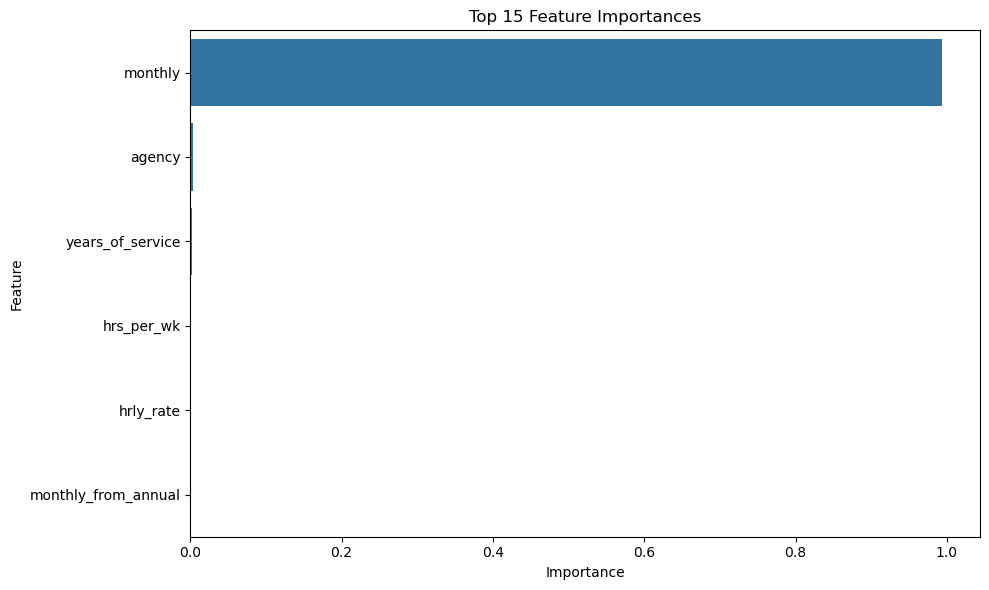

In [92]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_data.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

### Randomized Search

In [93]:
# Define base model
xgb = XGBRegressor(random_state=42)

In [94]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

In [95]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [96]:
# Fit to training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [97]:
# Best parameters
print("Best Parameters:\n", random_search.best_params_)

Best Parameters:
 {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}


In [98]:
# Evaluate the best model
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

In [99]:
mae = mean_absolute_error(y_test, y_pred_best)
rmse = mean_squared_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

In [100]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 279.70
RMSE: 4821962.17
R² Score: 0.9925


### Grid Search 

In [101]:
# Define the model
rf = RandomForestRegressor(random_state=42)

In [102]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [103]:
# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [104]:
# Fit to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [105]:
# Best parameters
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)

Best parameters found by Grid Search:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [106]:
# Best model
best_rf_model = grid_search.best_estimator_

In [107]:
y_pred = best_rf_model.predict(X_test)

In [108]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [109]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 1594378.07
R² Score: 0.9975


## Conclusion: Salary Prediction Using Machine Learning

This project aimed to predict employee annual salaries based on multiple attributes such as job title, agency, employment status, years of service, and demographic factors using machine learning techniques.
After building and evaluating five different machine learning models - Linear Regression, Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor, and Support Vector Regressor the results indicate that:

XGBoost Regressor consistently outperformed the others across all key evaluation metrics:

- **Lowest Mean Absolute Error (MAE)**

- **Lowest Root Mean Squared Error (RMSE)**

- **Highest R² Score (explained variance)**

This suggests that XGBoost was best at capturing complex, non-linear relationships within the dataset and generalizing well on unseen data.